In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
isp4=pd.read_csv("/content/Untitled Folder/imployment.csv")

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
le=LabelEncoder()

In [10]:
isp4['Gender'] = le.fit_transform(isp4['Gender'])
isp4['MaritalStatus'] = le.fit_transform(isp4['MaritalStatus'])
isp4['Education'] = le.fit_transform(isp4['Education'])
isp4['EnvironmentSatisfaction'] = le.fit_transform(isp4['EnvironmentSatisfaction'])
isp4['OverTime'] = le.fit_transform(isp4['OverTime'])

In [5]:
isp4_numeric=isp4.select_dtypes(int)

In [6]:
isp4_numeric.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,0,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,1,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,1,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,0,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [8]:
isp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

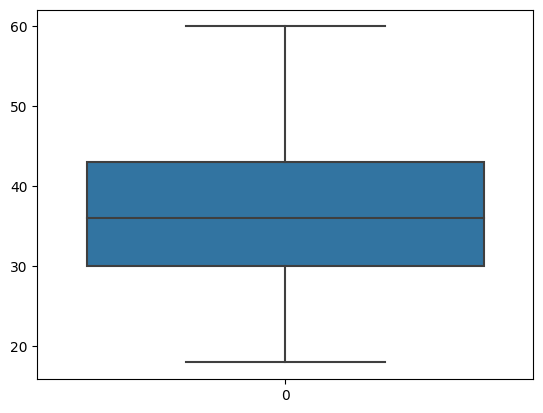

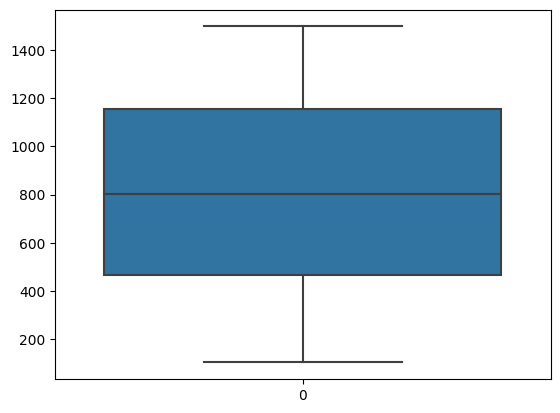

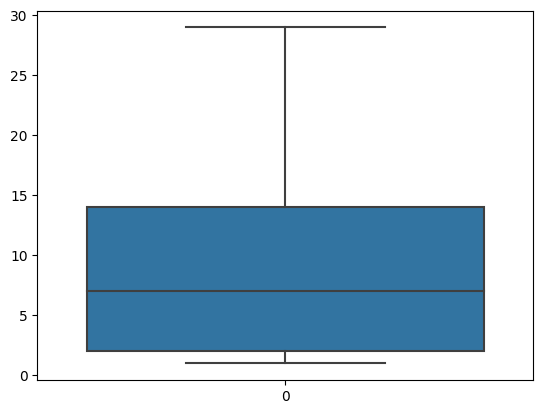

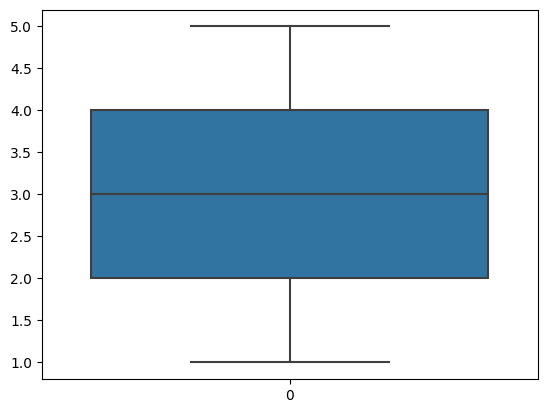

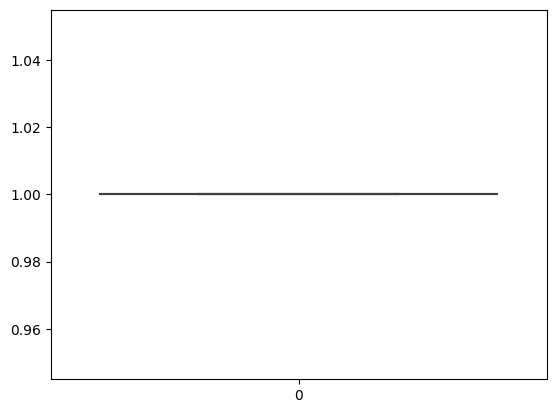

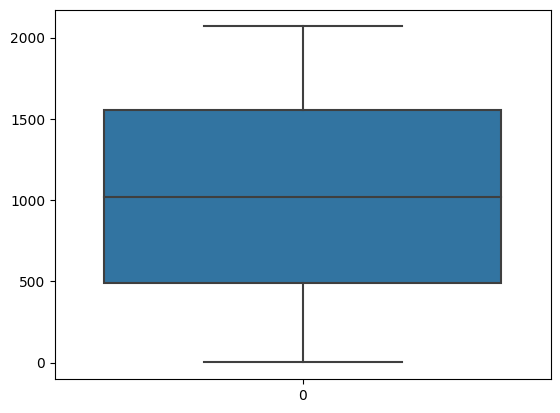

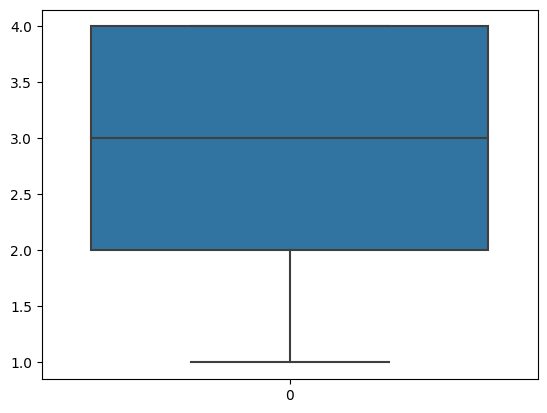

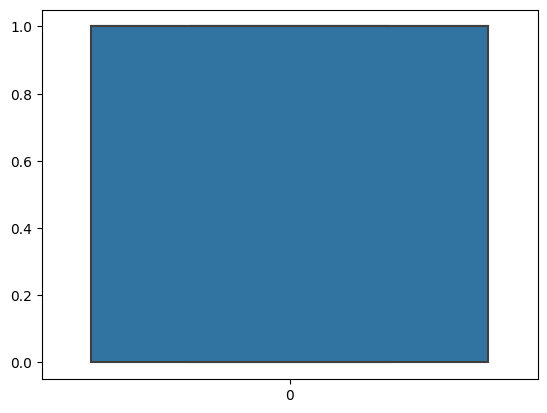

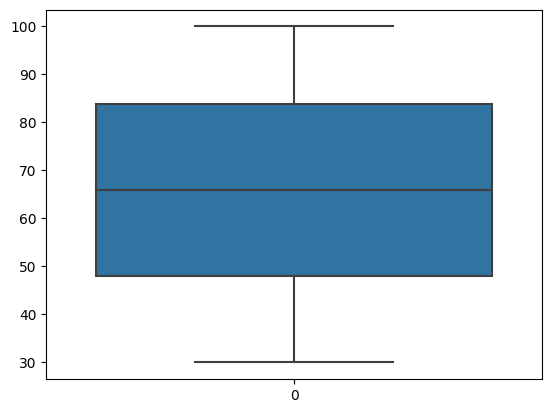

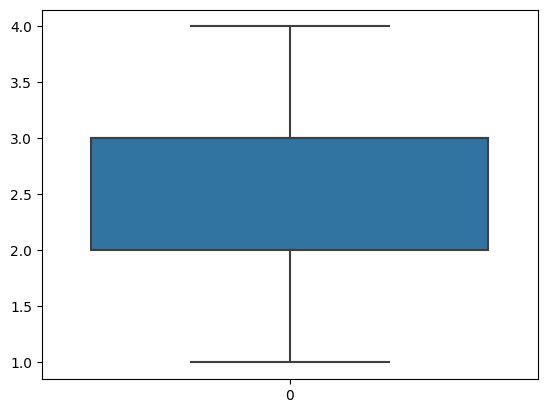

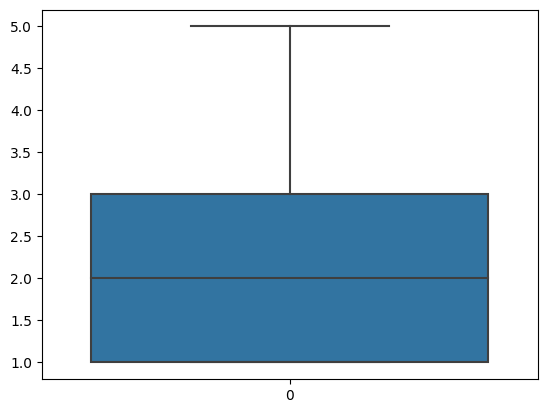

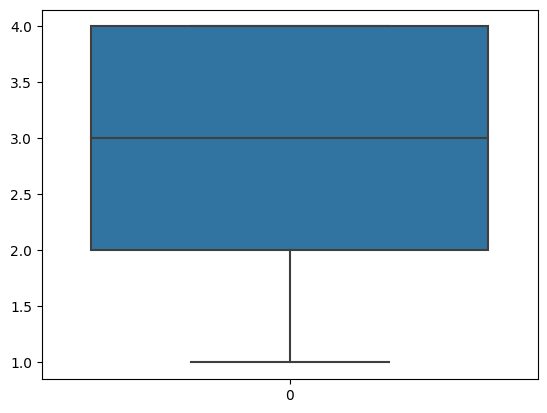

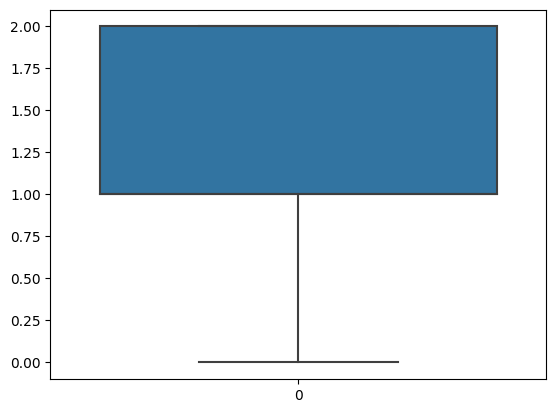

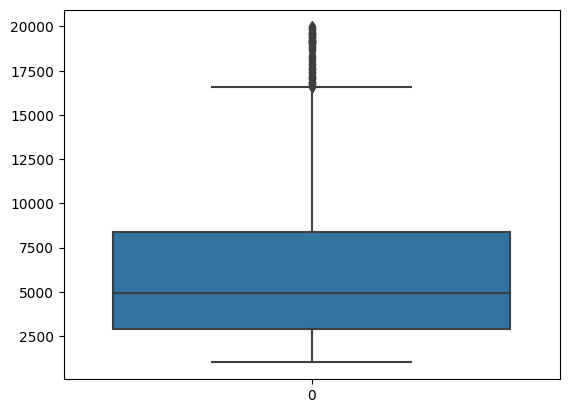

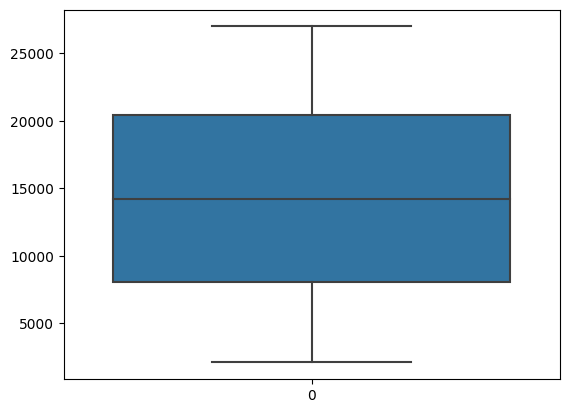

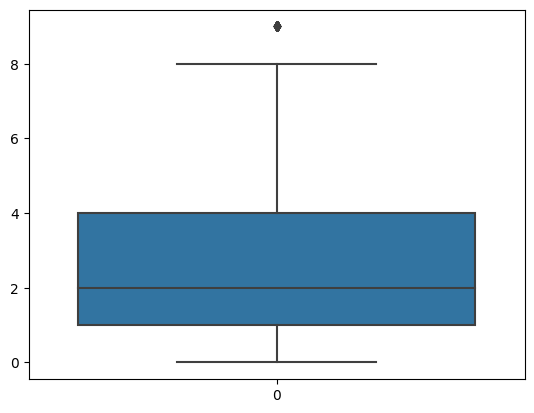

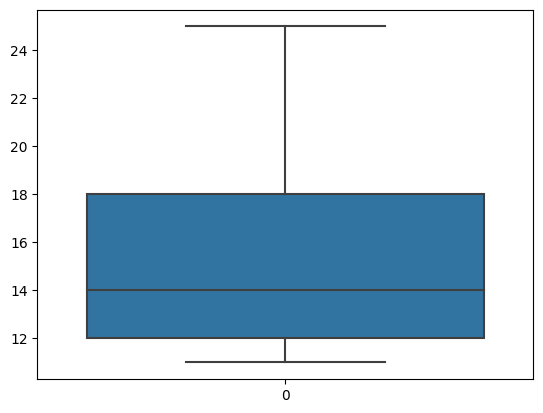

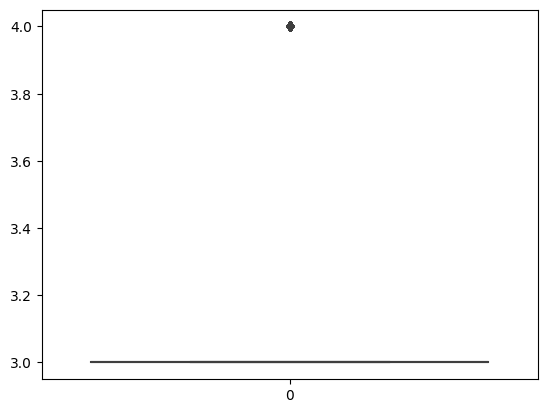

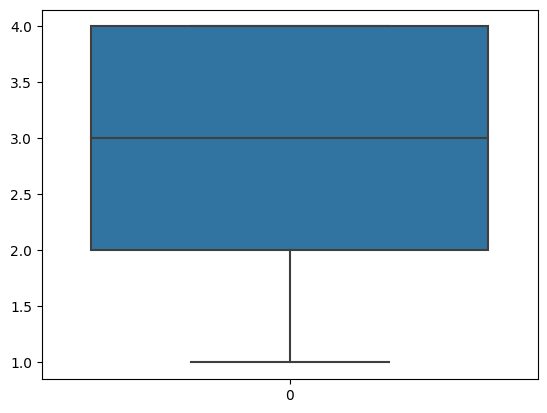

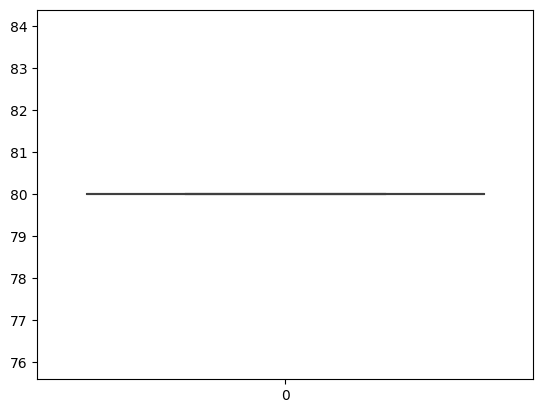

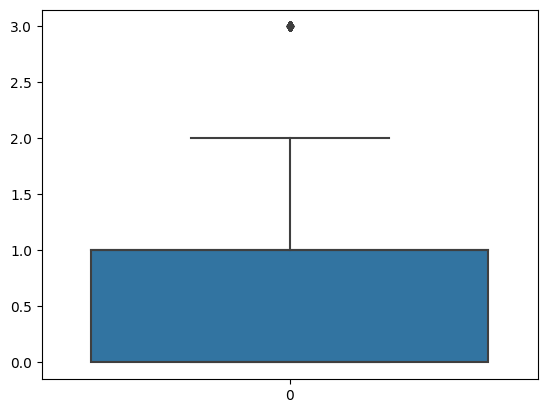

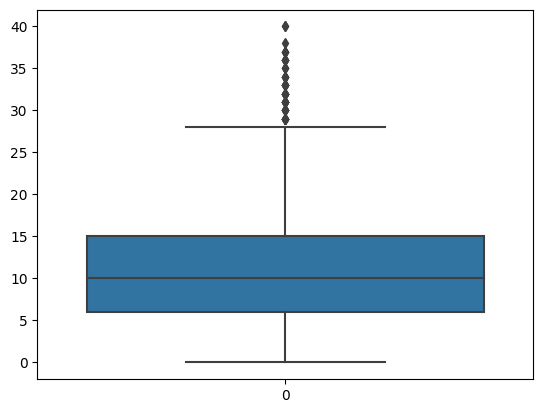

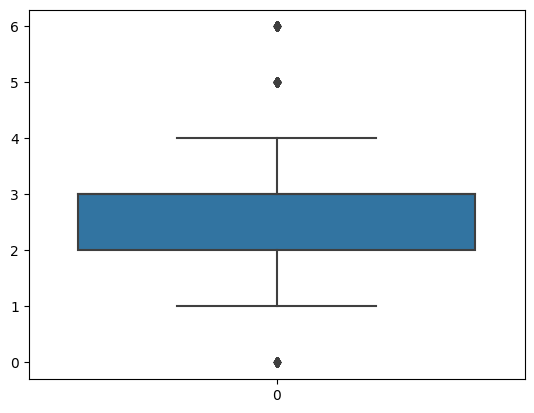

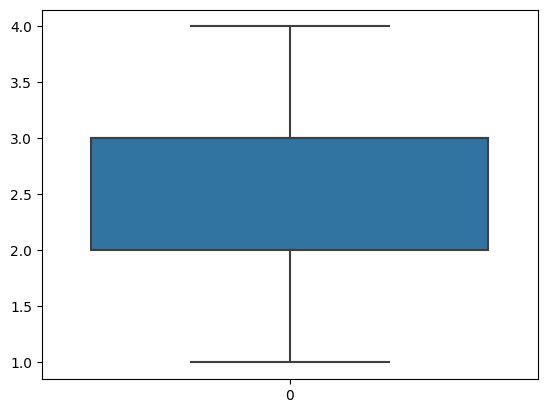

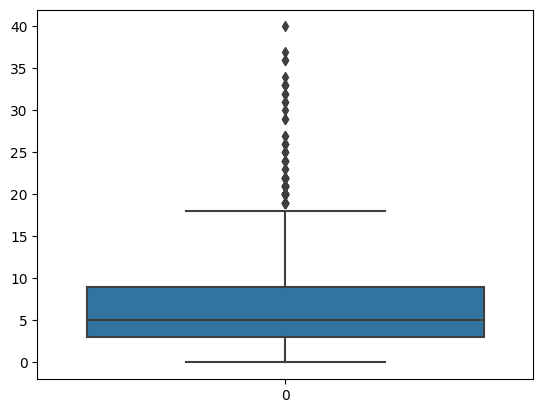

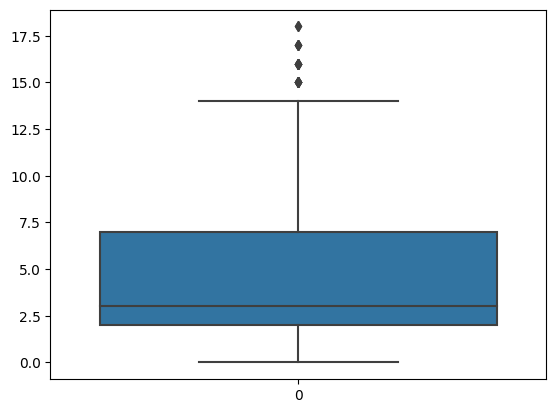

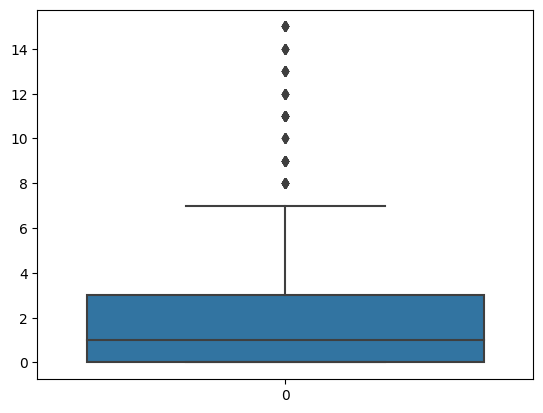

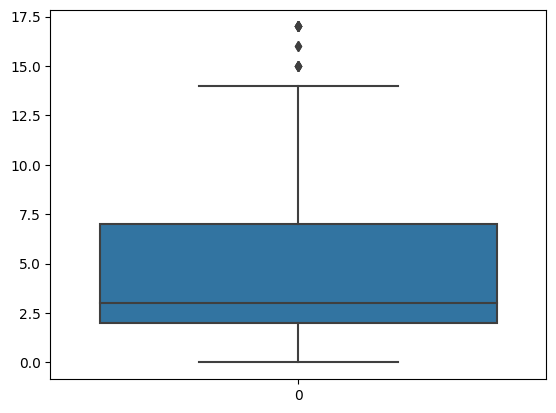

In [11]:
# cleaning the dataset from outliers
for i in isp4_numeric:
    sns.boxplot(isp4_numeric[i])
    plt.show()

In [13]:
# removing outlier from monthly billing
Q1 = isp4_numeric['MonthlyIncome'].quantile(0.25)
Q3 = isp4_numeric['MonthlyIncome'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

# outlier =[]
# for x in isp4_numeric['MonthlyBilling']:
#     if ((x> up_lim) or (x<low_lim)):
#         outlier.append(x)
# print('outlier in the dataset is', outlier)

IQR is 5468.0
low_limit is -5291.0
up_limit is 16581.0


In [14]:
isp4_numeric=isp4_numeric[(isp4_numeric['TrainingTimesLastYear'] < up_lim) & (isp4_numeric['TrainingTimesLastYear'] > low_lim)]

In [15]:
# removing outlier from years at company
Q1 = isp4_numeric['YearsAtCompany'].quantile(0.25)
Q3 = isp4_numeric['YearsAtCompany'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)


# outlier =[]
# for x in new_df_numric['YearsAtCompany']:
#     if ((x> up_lim) or (x<low_lim)):
#         outlier.append(x)
# print('outlier in the dataset is', outlier)

IQR is 6.0
low_limit is -6.0
up_limit is 18.0


In [16]:
isp4_numeric=isp4_numeric[(isp4_numeric['YearsAtCompany'] < up_lim) & (isp4_numeric['YearsAtCompany'] > low_lim)]

In [17]:
# removing outlier from years since last promotion
Q1 = isp4_numeric['YearsSinceLastPromotion'].quantile(0.25)
Q3 = isp4_numeric['YearsSinceLastPromotion'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)


# outlier =[]
# for x in new_df_numric['YearsSinceLastPromotion']:
#     if ((x> up_lim) or (x<low_lim)):
#         outlier.append(x)
# print('outlier in the dataset is', outlier)

IQR is 2.0
low_limit is -3.0
up_limit is 5.0


In [18]:
isp4_numeric=isp4_numeric[(isp4_numeric['YearsSinceLastPromotion'] < up_lim) & (isp4_numeric['YearsSinceLastPromotion'] > low_lim)]

In [20]:
Q1 = isp4_numeric['YearsWithCurrManager'].quantile(0.25)
Q3 = isp4_numeric['YearsWithCurrManager'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

# outliers = []
# for i in isp4_numeric['YearsWithCurrManager ']:
#     if ((i < low_lim) or (i > up_lim)):
#         outliers.append(i)
# print(outliers)

IQR is 3.0
low_limit is -3.5
up_limit is 8.5


In [21]:
isp4_numeric = isp4_numeric[(isp4_numeric['YearsWithCurrManager'] < up_lim) & (isp4_numeric['YearsWithCurrManager'] > low_lim)]
isp4_numeric.shape

(1103, 28)

In [22]:
isp4_numeric=isp4_numeric.reset_index()

In [23]:
isp4_numeric.drop(['index'],axis=1,inplace=True)

In [25]:
isp4_numeric.drop(['Gender','HourlyRate'],axis=1,inplace=True)

In [26]:
isp4_numeric.shape

(1103, 26)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
isp4_numeric.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [29]:
# x=isp4_numeric[['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Travelling',
#        'Qualifications', 'EmployeSatisfaction', 'JobEngagement', 'JobLevel',
#        'JobSatisfaction', 'DailyBilling', 'HourBilling', 'MonthlyBilling',
#        'MonthlyRate', 'Work Experience', 'OverTime', 'PercentSalaryHike',
#        'Last Rating', 'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
#        'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
#        'YearsInCurrentRole', 'YearsSinceLastPromotion',
#        'YearsWithCurrentManager', 'DistanceFromHome']].values

In [30]:
x = isp4_numeric.drop(['Education'],axis=1)
y = isp4_numeric['Education']

In [31]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(n_estimators=50)

In [34]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [36]:
rf_model.score(xtest,ytest)

0.38368580060422963

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
pred=rf_model.predict(xtest)

In [39]:
score = accuracy_score(ytest,pred)
score

0.38368580060422963

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
etc=ExtraTreesClassifier(n_estimators=50)

In [42]:
etc.fit(xtrain,ytrain)

ExtraTreesClassifier(n_estimators=50)

In [43]:
etc.score(xtest,ytest)

0.3685800604229607

In [44]:
pred=etc.predict(xtest)

In [45]:
score = accuracy_score(ytest,pred)
score

0.3685800604229607

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbc = GradientBoostingClassifier()

In [48]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [49]:
gbc.score(xtest,ytest)

0.338368580060423

In [50]:
pred=gbc.predict(xtest)

In [51]:
score = accuracy_score(ytest,pred)
score

0.338368580060423

In [52]:
confusion_matrix(ytest,pred)

array([[10,  4, 21,  7,  0],
       [ 4,  2, 41, 18,  2],
       [ 7, 17, 72, 32,  0],
       [ 2, 12, 41, 28,  0],
       [ 0,  2,  4,  5,  0]])

In [53]:
# confusion matrix metrics
matrix=classification_report(ytest,pred)

In [54]:
print(matrix)

              precision    recall  f1-score   support

           1       0.43      0.24      0.31        42
           2       0.05      0.03      0.04        67
           3       0.40      0.56      0.47       128
           4       0.31      0.34      0.32        83
           5       0.00      0.00      0.00        11

    accuracy                           0.34       331
   macro avg       0.24      0.23      0.23       331
weighted avg       0.30      0.34      0.31       331



In [55]:
# Best model will be Rnadom Forest Classifier model.
# As its accuracy is highest.